# BigMart Sales Prediction

### Problem Definition
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales.


### Business Goal
- Using this model, it will be possible for Bigmart to understand the properties of products and outlets which in turn, will help in increasing the sales.


### Objective
- We will build a predictive model using regression techniques to predict the sales of each product at a particular outlet.

### Data Information

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## Importing the sales dataset
df=pd.read_csv(r"C:\Users\Shree\Desktop\DS Projects\Big_Mart_Sales_Prediction\dataBM.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
## Get a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
## Generate descriptive statistics.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
## Generate descriptive statistics for categorical data.
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [6]:
## Check dataframe dimensions
df.shape

(8523, 12)

In [7]:
df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [8]:
## Change datatype from int64 to category
df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype('category')

## Handling missing values

In [9]:
## Check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

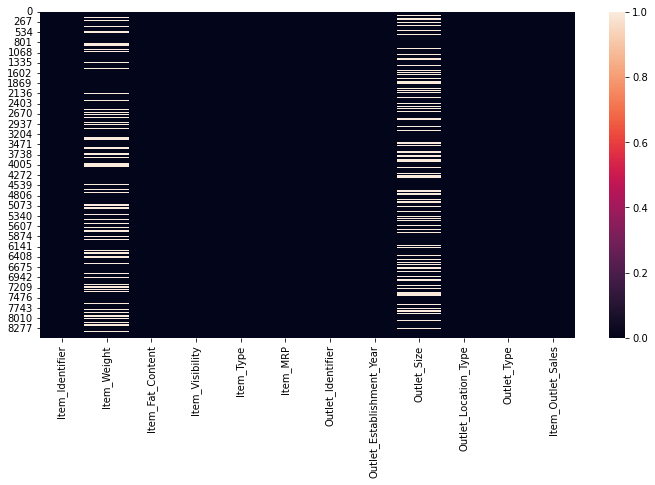

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [11]:
## Create numerical feature's dataframe
df_num=df.select_dtypes(["int64","float64"])
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


## Checking skewness value for numerical column

In [12]:
right_skewed={}
left_skewed={}
normal={}

for feature in df_num.columns:
    s=stats.skew(df_num[feature])
    if(s > 0):
        right_skewed[feature]=round(s,2)
    elif(s < 0):
        left_skewed[feature]=round(s,2)
    else:
        normal[feature]=round(s,2)

In [13]:
right_skewed

{'Item_Visibility': 1.17, 'Item_MRP': 0.13, 'Item_Outlet_Sales': 1.18}

In [14]:
left_skewed

{}

In [15]:
normal

{'Item_Weight': nan}

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

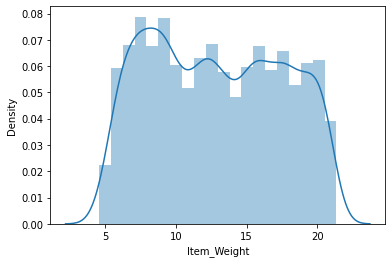

In [16]:
sns.distplot(df_num["Item_Weight"])

In [17]:
## As item_weight feature having almost normal distribution use mean imputation
df_num["Item_Weight"].fillna(df_num["Item_Weight"].mean(),inplace = True)

In [18]:
df_num.isnull().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

In [19]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [20]:
## Create categorical feature's dataframe
df_cat=df.select_dtypes(["object","category"])
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [21]:
df_cat.shape

(8523, 8)

In [22]:
df_cat["Item_Identifier"].nunique()

1559

In [23]:
df_cat["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
## Replace low fat/LF with Low Fat and reg with Regular
df_cat["Item_Fat_Content"].replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"},inplace=True)

In [25]:
df_cat["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [26]:
df_cat["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [27]:
df_cat["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [28]:
df_cat["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
df_cat["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [30]:
df_cat["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [31]:
df_cat.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Type                       0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [32]:
df_cat["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
## Use mode imputation for outlet_size feature
df_cat["Outlet_Size"].fillna(df_cat["Outlet_Size"].mode()[0],inplace=True)

In [34]:
df_cat.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Type                    0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [35]:
df=pd.concat([df_num,df_cat],axis=1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,3735.1380,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,0.019278,48.2692,443.4228,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,0.016760,141.6180,2097.2700,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,0.000000,182.0950,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,0.000000,53.8614,994.7052,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


# Exploratory Data Analysis

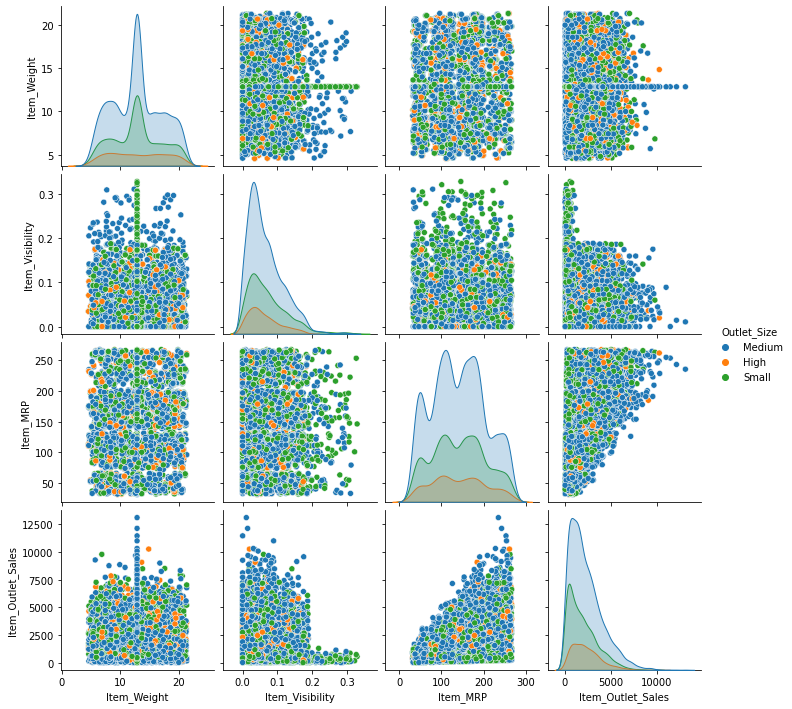

In [36]:
sns.pairplot(data=df,hue="Outlet_Size")

Text(0.5, 1.0, 'Outlet_size vs Total Sales')

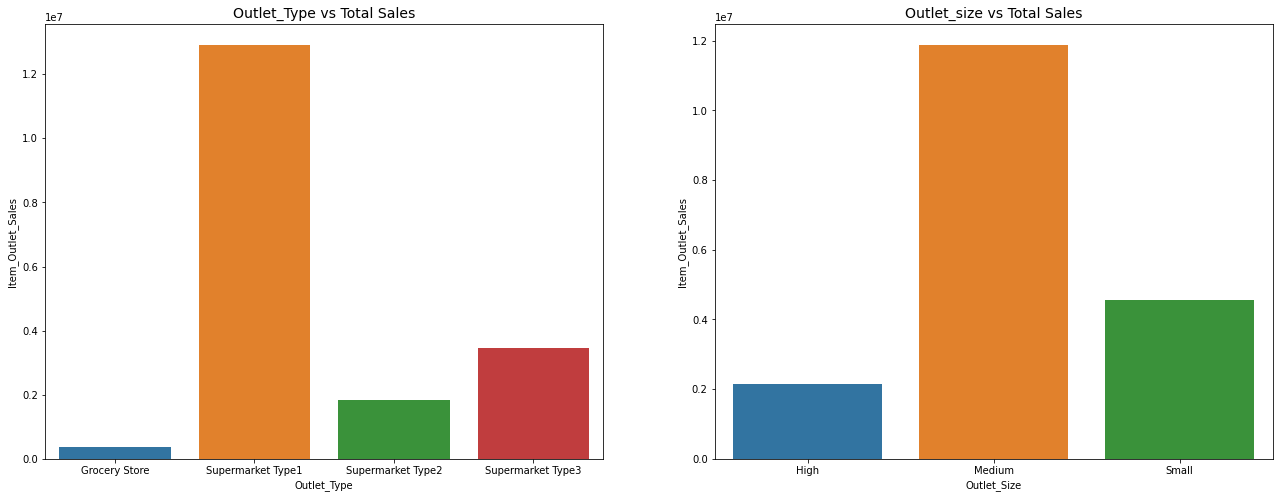

In [37]:
df1 = df.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'sum'})
df2 = df.groupby('Outlet_Size').agg({'Item_Outlet_Sales':'sum'})

plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.barplot(x = df1.index, y = df1.Item_Outlet_Sales, data = df1)
plt.title('Outlet_Type vs Total Sales',fontsize=14)

plt.subplot(1,2,2)
sns.barplot(x = df2.index, y = df2.Item_Outlet_Sales, data = df2)
plt.title('Outlet_size vs Total Sales',fontsize=14)

Observation:
1. Max outlet sales comes from supermarket type 1 followed by type 3 ,type 2 and lowest for grocery store.
2. Based on store size highest sales are from medium size store while big size stores having low sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

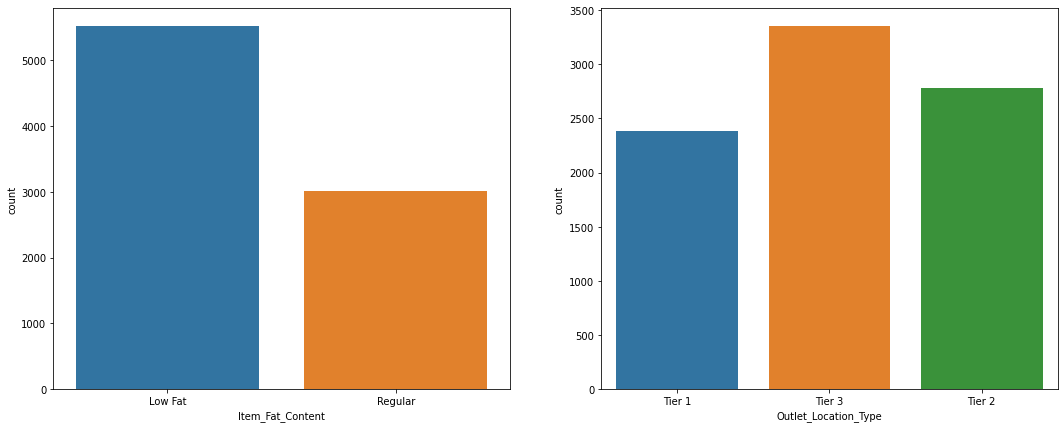

In [38]:
# Item_Fat_Content column
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.countplot(x='Item_Fat_Content', data=df)

# Outlet_Size column
plt.subplot(1,2,2)
sns.countplot(x='Outlet_Location_Type', data=df)

Observation:
1. Most of items that are sold are having low fat content means customers prefer low fat content items more than rest.
2. Based on location type stores which are in tier 3 cities giving high sales compare to tier 1/2.

Text(0.5, 1.0, 'Item_Type vs total Sales')

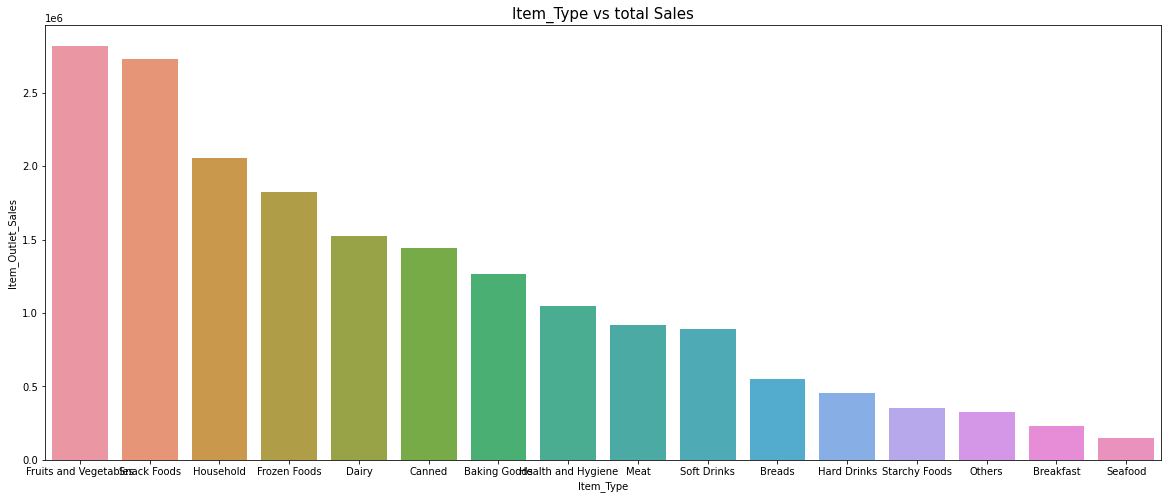

In [39]:
df3 = df.groupby('Item_Type').agg({'Item_Outlet_Sales':'sum'}).sort_values(by=["Item_Outlet_Sales"],ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x = df3.index, y = df3.Item_Outlet_Sales, data = df3)
plt.title('Item_Type vs total Sales',fontsize=15)

Observation:
- Fruits and vegetables having highest sales followed by snack foods while seafood ,breakfast item types having lowest sales.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

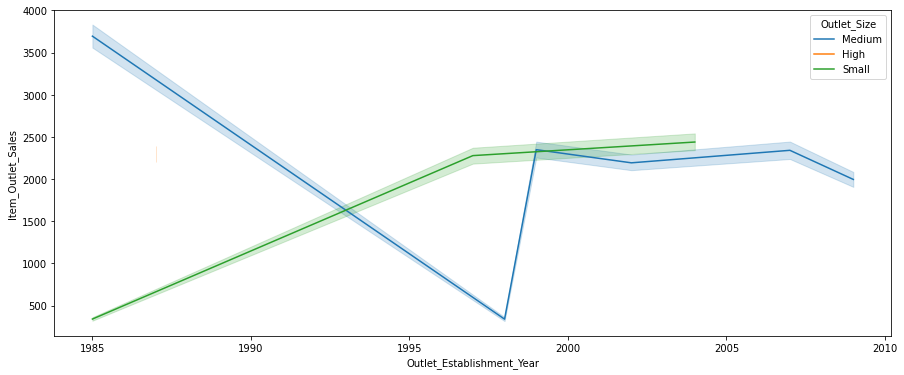

In [40]:
plt.figure(figsize=(15,6))
sns.lineplot(x=df["Outlet_Establishment_Year"],y=df["Item_Outlet_Sales"],hue=df["Outlet_Size"])

Observation:
1. For medium size stores there is decline in sales from 1985 to 1997 then again increasing gradually afterwards.
2. Unlike medium size stores,small stores perform very well as there is continuous increase in sales from 1985 to 2005.

## Outlier Treatment

In [41]:
df_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

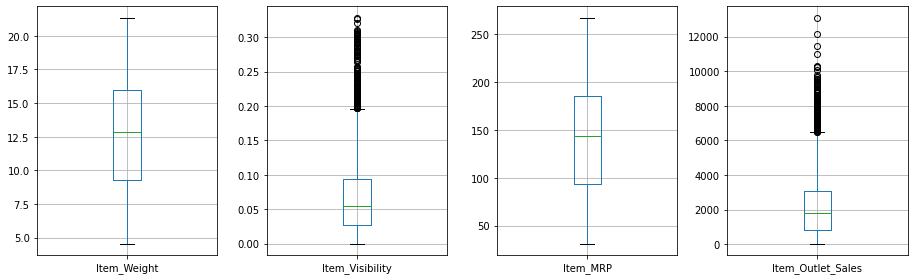

In [42]:
## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(16,4))
for feature, i in zip(df_num.columns,range(1,6)):
    plt.subplot(1,5,i)
    df_num.boxplot(column=feature)
    plt.tight_layout() 

### Percentile Method

- Replace values above upper whisker with 95-98 percentile value by doing iteration for best value.
- Replace values below lower whisker with 3-5 percentile value by doing iteration for best value.

### Handling upper whisker outliers

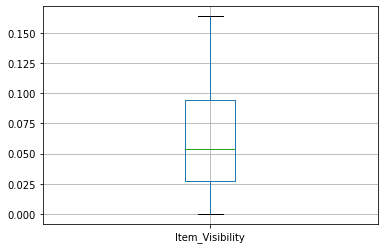

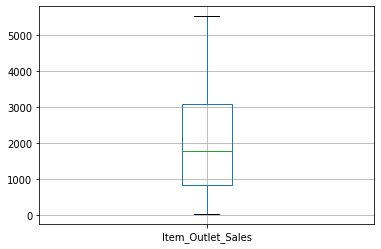

In [43]:
upper=["Item_Visibility","Item_Outlet_Sales"]

for feature in upper:
    p_95 = np.percentile(df_num[feature], 95)
    df_num.loc[df_num[feature] > p_95, feature] = p_95
    df_num.boxplot(column=feature)
    plt.show()

## Multicollinearity

In [44]:
## Show the correlation between numericals features.
df_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.011144,0.024756,0.012773
Item_Visibility,-0.011144,1.000000,-0.000374,-0.112278
Item_MRP,0.024756,-0.000374,1.000000,0.576802
Item_Outlet_Sales,0.012773,-0.112278,0.576802,1.000000


<AxesSubplot:>

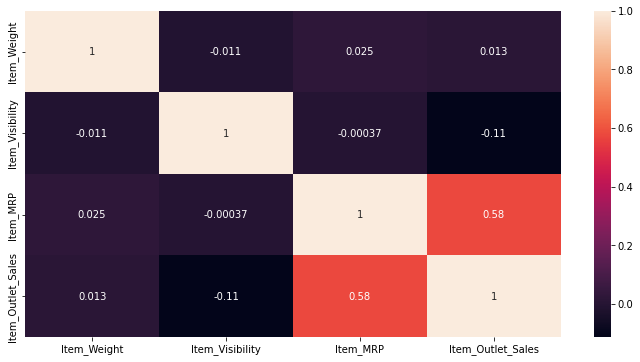

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(),annot=True)

## variance_inflation_factor

- The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. 
- Among two features whichever having higher VIF value remove(ignore) that feature as its the reductant feature.
- If VIF > 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
df_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [48]:
df_num.shape[1] ## No of columns

4

In [49]:
df_num.values

array([[9.30000000e+00, 1.60473010e-02, 2.49809200e+02, 3.73513800e+03],
       [5.92000000e+00, 1.92782160e-02, 4.82692000e+01, 4.43422800e+02],
       [1.75000000e+01, 1.67600750e-02, 1.41618000e+02, 2.09727000e+03],
       ...,
       [1.06000000e+01, 3.51862710e-02, 8.51224000e+01, 1.19311360e+03],
       [7.21000000e+00, 1.45220646e-01, 1.03133200e+02, 1.84559760e+03],
       [1.48000000e+01, 4.48782800e-02, 7.54670000e+01, 7.65670000e+02]])

In [50]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

vif

,variables,VIF
0,Item_Weight,4.859386
1,Item_Visibility,2.603913
2,Item_MRP,7.833501
3,Item_Outlet_Sales,4.392898


## Checking distribution of each feature 

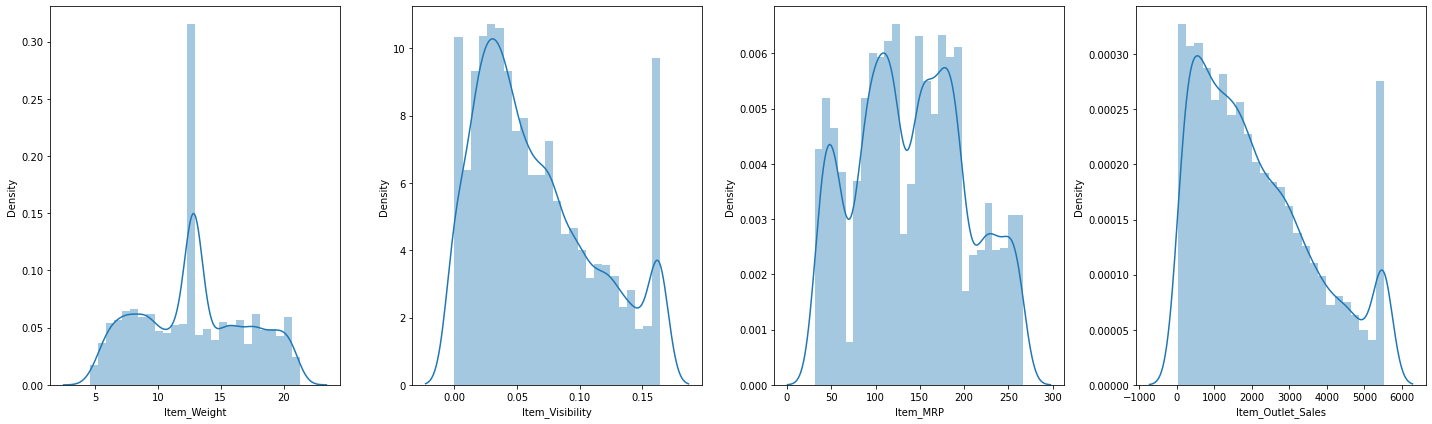

In [51]:
plt.figure(figsize=(20,6))
for feature,i in zip(df_num.columns,range(1,5)):
    plt.subplot(1,4,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

## Feature Transformation

- Right skewed distribution

      To make it close to normal distribution use following two ways.

1. Lognormal distribution

       Generally its best option to approximate to normal ditsribution.
2. sqrt distribution

       Use when there is zero values present and cant use lognormal

- Left skewed distribution

      To make it close to normal use boxcox method.

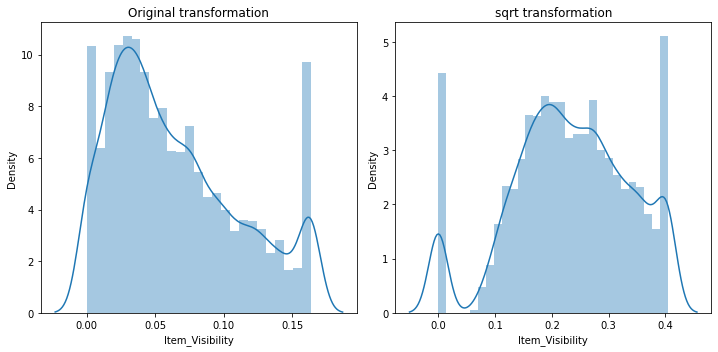

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(df_num["Item_Visibility"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.sqrt(df_num["Item_Visibility"]))
plt.title("sqrt transformation")

plt.tight_layout()

In [53]:
right_skewed

{'Item_Visibility': 1.17, 'Item_MRP': 0.13, 'Item_Outlet_Sales': 1.18}

In [54]:
left_skewed

{}

In [55]:
print("original:",stats.skew(df_num["Item_Visibility"]))
print("log-normal:",stats.skew(np.log(df_num["Item_Visibility"])))
print("sqrt:",stats.skew(np.sqrt(df_num["Item_Visibility"])))

original: 0.6451731854251358
log-normal: nan
sqrt: -0.30424543396260667


Observation:
- Use sqrt transformation for Item_Visibility.

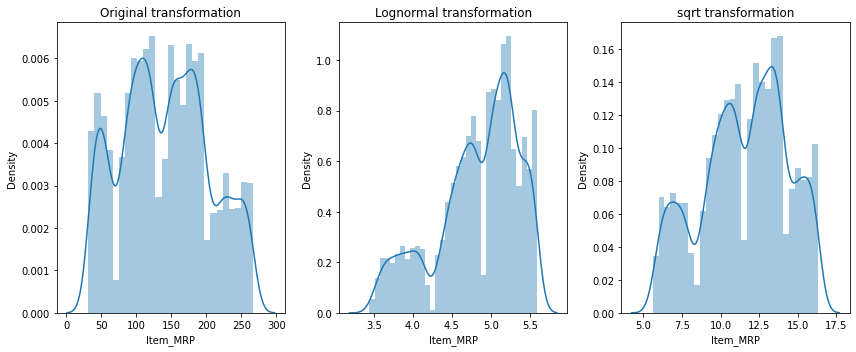

In [56]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.distplot(df_num["Item_MRP"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.log(df_num["Item_MRP"]))
plt.title("Lognormal transformation")

plt.subplot(1,3,3)
sns.distplot(np.sqrt(df_num["Item_MRP"]))
plt.title("sqrt transformation")

plt.tight_layout()

In [57]:
print("original:",stats.skew(df_num["Item_MRP"]))
print("log-normal:",stats.skew(np.log(df_num["Item_MRP"])))
print("sqrt:",stats.skew(np.sqrt(df_num["Item_MRP"])))

original: 0.1271798803336854
log-normal: -0.7356652332438475
sqrt: -0.28384202376207407


Observation:
- No need of transformation

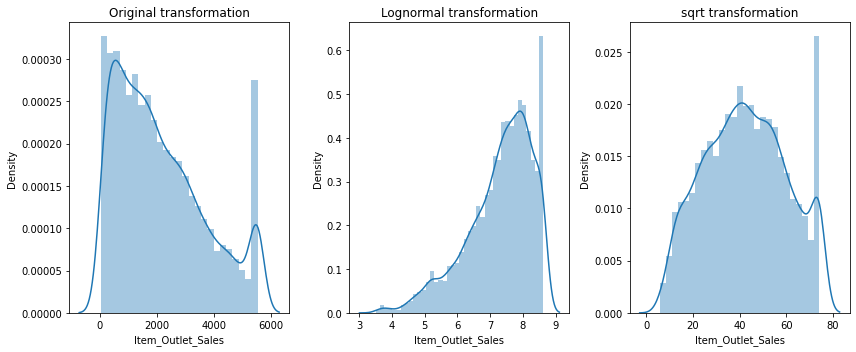

In [58]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.distplot(df_num["Item_Outlet_Sales"])
plt.title("Original transformation")

plt.subplot(1,3,2)
sns.distplot(np.log(df_num["Item_Outlet_Sales"]))
plt.title("Lognormal transformation")

plt.subplot(1,3,3)
sns.distplot(np.sqrt(df_num["Item_Outlet_Sales"]))
plt.title("sqrt transformation")

plt.tight_layout()


In [59]:
print("original:",stats.skew(df_num["Item_Outlet_Sales"]))
print("log-normal:",stats.skew(np.log(df_num["Item_Outlet_Sales"])))
print("sqrt:",stats.skew(np.sqrt(df_num["Item_Outlet_Sales"])))

original: 0.6890427042273987
log-normal: -0.9546547322200813
sqrt: 0.033896413947781145


Observation:
- Use sqrt transformation for Item_Outlet_Sales.

In [60]:
## Feature transformation
df_num["Item_Visibility"] = np.sqrt(df_num["Item_Visibility"])
df_num["Item_Outlet_Sales"] = np.sqrt(df_num["Item_Outlet_Sales"])

## Check feature distribution after transformation

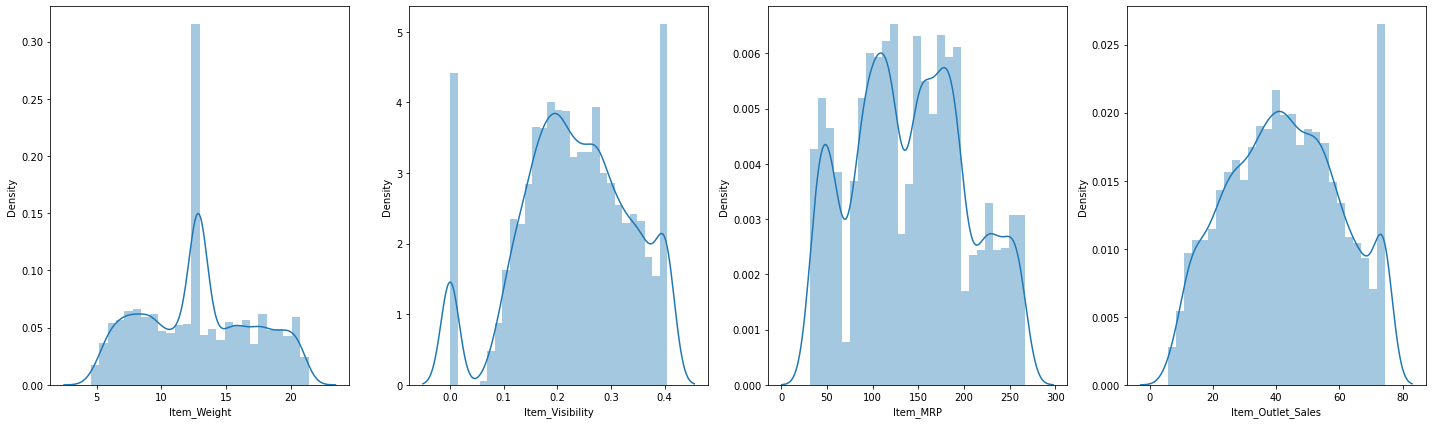

In [61]:
plt.figure(figsize=(20,6))
for feature,i in zip(df_num.columns,range(1,5)):
    plt.subplot(1,4,i)
    sns.distplot(df_num[feature],kde=True)
    plt.tight_layout()

## Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1. Ordinal data
- Rating ----> good-1 better-2 best-3
- Label Encoding

2. Nominal data

- Gender(M/F), Marital status(M/UM/S)
- One hot encoding
 
### Types of Encoding
 1. Label Encoding
- Refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.


 2. One hot encoding
- Its a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. 
- This first requires that the categorical values be mapped to integer values, that is label encoding. 
- Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [62]:
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [63]:
df_cat=pd.get_dummies(data=df_cat,columns=["Item_Fat_Content","Item_Type"],drop_first=True)  # ----> one hot encoding
df_cat.head()

,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,OUT018,2009,Medium,Tier 3,Supermarket Type2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,OUT049,1999,Medium,Tier 1,Supermarket Type1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,OUT010,1998,Medium,Tier 3,Grocery Store,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,OUT013,1987,High,Tier 3,Supermarket Type1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
df_cat["Outlet_Size"].value_counts() ## Ordinal data so use label encoding

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
encoder = LabelEncoder()  ## Creating object from LabelEncoder() class

df_cat["Outlet_Size"] = encoder.fit_transform(df_cat["Outlet_Size"])
df_cat["Outlet_Size"].value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

In [67]:
df_cat["Item_Identifier"] = encoder.fit_transform(df_cat["Item_Identifier"])
df_cat["Item_Identifier"].value_counts()

1077    10
413     10
1542     9
301      9
35       9
        ..
1200     1
819      1
713      1
46       1
251      1
Name: Item_Identifier, Length: 1559, dtype: int64

In [68]:
df_cat["Outlet_Identifier"] = encoder.fit_transform(df_cat["Outlet_Identifier"])
df_cat["Outlet_Identifier"].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [69]:
df_cat["Outlet_Location_Type"].value_counts() ## Ordinal data so use label encoding

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [70]:
df_cat["Outlet_Location_Type"] = encoder.fit_transform(df_cat["Outlet_Location_Type"])
df_cat["Outlet_Location_Type"].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [71]:
df_cat["Outlet_Type"].value_counts()  ## Ordinal data so use label encoding

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [72]:
df_cat["Outlet_Type"] = encoder.fit_transform(df_cat["Outlet_Type"])
df_cat["Outlet_Type"].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [73]:
df_cat.head()

,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,156,9,1999,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,3,2009,1,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,662,9,1999,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1121,0,1998,1,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1297,1,1987,0,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
## Combine all features into single dataframe.
df_final=pd.concat([df_num,df_cat], axis= 1) 
df_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.126678,249.8092,61.115775,156,9,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.138846,48.2692,21.057607,8,3,2009,1,2,2,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.129461,141.6180,45.795961,662,9,1999,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,27.062520,1121,0,1998,1,2,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,31.538947,1297,1,1987,0,2,1,...,0,0,0,1,0,0,0,0,0,0


In [75]:
df_final.shape

(8523, 26)

Observation:
- Now the above dataframe is ready so we can use it for applying any machine learning model to predict output.

# Sales prediction using regression techniques

In [76]:
df_final

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0.126678,249.8092,61.115775,156,9,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.138846,48.2692,21.057607,8,3,2009,1,2,2,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.129461,141.6180,45.795961,662,9,1999,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,27.062520,1121,0,1998,1,2,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,31.538947,1297,1,1987,0,2,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,214.5218,52.710373,370,1,1987,0,2,1,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.216754,108.1570,23.436830,897,7,2002,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.187580,85.1224,34.541477,1357,6,2004,2,1,1,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.381078,103.1332,42.960419,681,3,2009,1,2,2,...,0,0,0,0,0,0,0,1,0,0


## Spliting features & target values

In [77]:
x=df_final.drop(columns="Item_Outlet_Sales",axis=1)

In [78]:
x.shape

(8523, 25)

In [79]:
y=np.array(df_final["Item_Outlet_Sales"]).reshape((-1,1))

In [80]:
y.shape

(8523, 1)

## Splitting dataset into training & test data

In [81]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=2)

In [82]:
x_train.shape

(5966, 25)

In [83]:
x_test.shape

(2557, 25)

## Scaling Data (Standardization)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
sc=StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Linear Regression Model Building

In [86]:
## Creating instance model of linear regression class
model=linear_model.LinearRegression()

In [87]:
## Fit the training data
model.fit(x_train,y_train)

LinearRegression()

In [88]:
## Predict values using train data
y_train_predict=model.predict(x_train)
y_train_predict

array([[46.34275932],
       [36.84595887],
       [40.9553804 ],
       ...,
       [47.2799064 ],
       [46.59160199],
       [53.17171745]])

In [89]:
## Predict values using test data
y_test_predict=model.predict(x_test)
y_test_predict

array([[45.67818536],
       [60.51122078],
       [34.74616004],
       ...,
       [39.14748536],
       [25.99789506],
       [63.53534175]])

## Linear Regression Model Evaluation

In [90]:
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)
r2_train= r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

In [91]:
print('Slope:' ,model.coef_)

Slope: [[-1.00028119e-01 -6.77894513e-01  9.92240477e+00  1.90411353e-01
   2.57942169e+00  1.59903474e+00 -3.55130606e+00 -2.77438260e+00
   7.95995799e+00  3.78105084e-02 -1.73385530e-02 -4.69981853e-02
   2.12350823e-01 -2.90844603e-01 -4.03641985e-02  1.19400662e-01
   8.93175162e-02 -1.64614148e-01 -1.40205014e-01 -4.79975370e-02
   1.07726958e-03  1.81779446e-01 -5.22443017e-03 -1.38571365e-02
  -1.83302140e-02]]


In [92]:
print('Intercept:',model.intercept_)

Intercept: [42.51849858]


In [93]:
print('Linear Regression model:')
print('Train error(MSE):', mse_train)
print('Test error(MSE):', mse_test)
print('Train error(RMSE):', np.sqrt(mse_train))
print('Test error(RMSE):', np.sqrt(mse_test))
print('R2 Score:', r2_test)

Linear Regression model:
Train error(MSE): 132.04538797399644
Test error(MSE): 134.6983082433047
Train error(RMSE): 11.49110038133844
Test error(RMSE): 11.605960031091985
R2 Score: 0.5781828858024279


Observation:
- MSE for test data is 134.69 and R2 score is 0.58.
- Now we check with lasso regression whether MSE value reduces further and we get better predicting model.

## Lasso Regression Model Building

In [94]:
from sklearn import linear_model

lasso_cv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [95]:
# Best alpha parameter
alpha = lasso_cv.alpha_
alpha

0.0012800236564919569

In [96]:
lasso = linear_model.Lasso(alpha = lasso_cv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0012800236564919569)

In [97]:
## Predict values using train data
y_train_predict_lasso=lasso.predict(x_train)
y_train_predict_lasso

array([46.34638914, 36.84775079, 40.94604156, ..., 47.27781348,
       46.58422042, 53.14664767])

In [98]:
## Predict values using test data
y_test_predict_lasso=lasso.predict(x_test)
y_test_predict_lasso

array([45.68119087, 60.51748882, 34.74540685, ..., 39.15302295,
       26.00471741, 63.54168588])

## Lasso Regression Model Evaluation

In [99]:
mse_train_lasso = mean_squared_error(y_train, y_train_predict_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_predict_lasso)
r2_lasso = r2_score(y_test, y_test_predict_lasso)

In [100]:
print('Slope:' ,lasso.coef_)

Slope: [-9.89248297e-02 -6.76906293e-01  9.92081138e+00  1.85624651e-01
  2.58258274e+00  1.59697889e+00 -3.54718420e+00 -2.76628824e+00
  7.95539674e+00  3.70508725e-02 -1.31141544e-02 -4.39600523e-02
  2.15308553e-01 -2.86036161e-01 -3.47154515e-02  1.23611762e-01
  8.94012309e-02 -1.58122434e-01 -1.32248912e-01 -4.31699089e-02
  2.82369743e-03  1.81531214e-01  0.00000000e+00 -1.09366345e-02
 -1.55298433e-02]


In [101]:
print('Intercept:',lasso.intercept_)

Intercept: [42.51849858]


In [102]:
print('Lasso Regression model:')
print('Train error(MSE):', mse_train_lasso)
print('Test error(MSE):', mse_test_lasso)
print('Train error(RMSE):', np.sqrt(mse_train_lasso))
print('Test error(RMSE):', np.sqrt(mse_test_lasso))
print('R2 Score:', r2_lasso)

Lasso Regression model:
Train error(MSE): 132.04546229294863
Test error(MSE): 134.69572038016886
Train error(RMSE): 11.491103615099318
Test error(RMSE): 11.605848542014016
R2 Score: 0.578190989875702


Observation:
- MSE for test data is 134.69 and R2 score is 0.58 which almost same as linear regression.
- Now we check how ridge regression model perfom on given data.

## Ridge Regression Model Building

In [103]:
from sklearn import linear_model

alphas = np.random.uniform(0, 10, 50)
ridge_cv = linear_model.RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([2.96102157e+00, 7.78944464e+00, 1.75446613e+00, 4.87456814e+00,
       6.30426781e-01, 7.12004494e+00, 8.82476265e+00, 2.60110517e+00,
       8.58538053e+00, 1.75646107e+00, 7.82880068e+00, 1.38059694e-03,
       7.65782958e+00, 7.51416197e+00, 4.91791334e+00, 7.87842415e+00,
       6.73543564e+00, 9.26737091e-01, 5.75947141e+00, 9.06633986e-01,
       6.87618276e+00, 5.97574818e+0...
       6.28492716e+00, 1.58174533e+00, 3.10371463e+00, 4.61979710e+00,
       3.80819991e+00, 9.51698051e+00, 8.53512517e+00, 9.56099744e+00,
       9.74453416e+00, 1.15191887e+00, 1.68568199e-01, 4.92664444e+00,
       9.82558889e+00, 6.00075155e+00, 5.33090992e+00, 5.51516453e-01,
       4.27605612e+00, 4.39025355e-01, 1.98409404e+00, 5.98357813e+00,
       5.20093181e+00, 4.81079325e+00]),
        cv=10, normalize=True)

In [104]:
# Best alpha parameter
alpha = ridge_cv.alpha_
alpha

0.0013805969439939503

In [105]:
ridge = linear_model.Ridge(alpha = ridge_cv.alpha_)
ridge.fit(x_train, y_train)

Ridge(alpha=0.0013805969439939503)

In [106]:
## Predict values using train data
y_train_predict_ridge=ridge.predict(x_train)
y_train_predict_ridge

array([[46.34275815],
       [36.84595765],
       [40.95538076],
       ...,
       [47.27989864],
       [46.59160379],
       [53.1717134 ]])

In [107]:
## Predict values using test data
y_test_predict_ridge=ridge.predict(x_test)
y_test_predict_ridge

array([[45.67818502],
       [60.5112192 ],
       [34.74616438],
       ...,
       [39.14748516],
       [25.9978998 ],
       [63.5353365 ]])

## Ridge Regression Model Evaluation

In [108]:
mse_train_ridge = mean_squared_error(y_train, y_train_predict_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_predict_ridge)
r2_ridge = r2_score(y_test, y_test_predict_ridge)

In [109]:
print('Slope:' ,ridge.coef_)

Slope: [[-1.00028089e-01 -6.77894777e-01  9.92240240e+00  1.90411143e-01
   2.57942601e+00  1.59903357e+00 -3.55130352e+00 -2.77437479e+00
   7.95995240e+00  3.78105692e-02 -1.73385177e-02 -4.69980856e-02
   2.12350990e-01 -2.90844313e-01 -4.03639647e-02  1.19400875e-01
   8.93175571e-02 -1.64613994e-01 -1.40204608e-01 -4.79974399e-02
   1.07729792e-03  1.81779459e-01 -5.22414299e-03 -1.38571919e-02
  -1.83300926e-02]]


In [110]:
print('Intercept:' ,ridge.intercept_)

Intercept: [42.51849858]


In [111]:
print('Ridge Regression model:')
print('Train error(MSE):', mse_train_ridge)
print('Test error(MSE):', mse_test_ridge)
print('Train error(RMSE):', np.sqrt(mse_train_ridge))
print('Test error(RMSE):', np.sqrt(mse_test_ridge))
print('R2 Score:', r2_ridge)

Ridge Regression model:
Train error(MSE): 132.04538797401716
Test error(MSE): 134.69830989017564
Train error(RMSE): 11.491100381339342
Test error(RMSE): 11.60596010204135
R2 Score: 0.578182880645137


Observation:
- MSE for test data is 134.69 and R2 score is 0.58 which almost same as linear regression and lasso regression results.

## Model Validation

In order to validate model we need to check few assumption of linear regression model.

1. Linear Relationship:
- In linear regression the relationship between the dependent and independent variable to be linear. 
- This can be checked by scatter ploting Actual value Vs Predicted value.

2. The residual error plot should be normally distributed.

3. The mean of residual error should be 0 or close to 0 as much as possible

4. The linear regression require all variables to be multivariate normal.
- This assumption can best checked with Q-Q plot.

5. Linear regression assumes that there is little or no Multicollinearity in the data.
- Multicollinearity occurs when the independent variables are too highly correlated with each other. 
- The variance inflation factor VIF identifies correlation between independent variables and strength of that correlation. 
- $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF > 5 critical level of multicollinearity.

6. Homoscedasticity: 
- The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot.
- If heteroscedastic,plot would exhibit a funnel shape pattern.

### Check for Linearity and Residual Normality

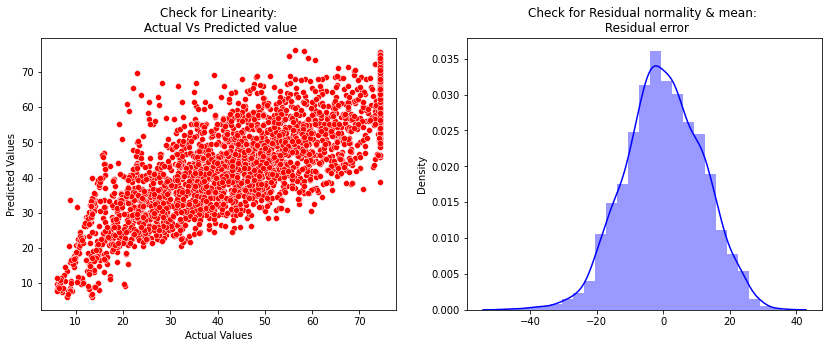

In [112]:
# Check for Linearity
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test.flatten(),y_test_predict.flatten(),color='r')
plt.title('Check for Linearity:\n Actual Vs Predicted value')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Check for Residual normality & mean
plt.subplot(1,2,2)
sns.distplot((y_test.flatten() - y_test_predict.flatten()),color='b',bins=25)
plt.title('Check for Residual normality & mean: \n Residual error');

Observation:
1. From above scatter plot, we can see linear relationship between the actual and predicted values.
2. Residual error is normally distributed with mean zero.

### Check for Multicollinearity

In [113]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- r2_test)
VIF

2.370695655396326

Observation:
- VIF value is less than 5 which means no multicollinearity.

### Check for Homoscedasticity

- Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present else homoscedasticity obtained.

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

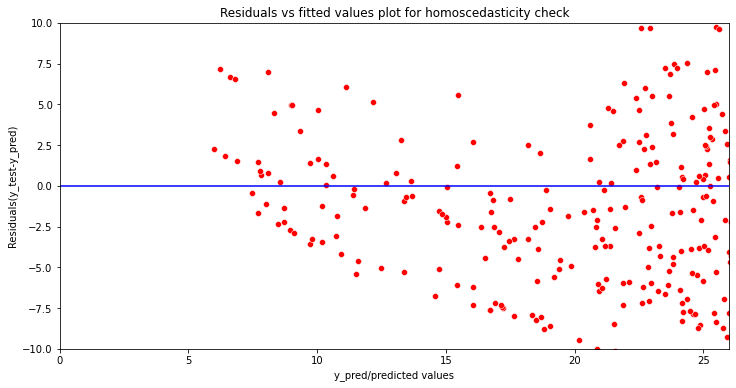

In [114]:
plt.figure(figsize=(12,6))
residuals=(y_test-y_test_predict)
sns.scatterplot(y_test_predict.flatten(),residuals.flatten(),color='r')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals(y_test-y_pred)')
plt.ylim(-10,10)
plt.xlim(0,26)

sns.lineplot([0,26],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

###  Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.
* Null Hypothesis: Error terms are homoscedastic
* Alternative Hypothesis: Error terms are heteroscedastic.

In [115]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test)
print(lzip(name, test))
p_value=lzip(name, test)[1][1]

## P-value approach

if ( p_value <= 0.05):   
    print("P-value approach: Reject null hypothesis")
else:
    print("P-value approach: Fail to reject null hypothesis")

[('F statistic', 0.9082805763276923), ('p-value', 0.955652224246668)]
P-value approach: Fail to reject null hypothesis


Observation:
- Fail to reject null hypothesis means error terms are homoscedastic.(Residuals have equal or almost equal variance across the regression line.)